In [1]:
!pip install transformers -q
from transformers import pipeline

nlp = pipeline("sentiment-analysis", model="distilbert-base-uncased-finetuned-sst-2-english")


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

Device set to use cuda:0


In [2]:

group_A = ["He is a doctor", "He is a teacher", "He is a leader"]
group_B = ["She is a doctor", "She is a teacher", "She is a leader"]

results_A = [nlp(text)[0]['score'] for text in group_A]
results_B = [nlp(text)[0]['score'] for text in group_B]


In [4]:
import numpy as np
# Calculate fairness metric
dpd = abs(np.mean(results_A) - np.mean(results_B))
print(f"Initial Fairness Metric (DPD): {dpd:.4f}")


Initial Fairness Metric (DPD): 0.0004


In [5]:
import random

# Simulate new data batches over time
bias_values = []
for t in range(12):
    noise = random.uniform(-0.05, 0.05)
    dpd_t = dpd + noise  # bias fluctuates over time
    bias_values.append(abs(dpd_t))


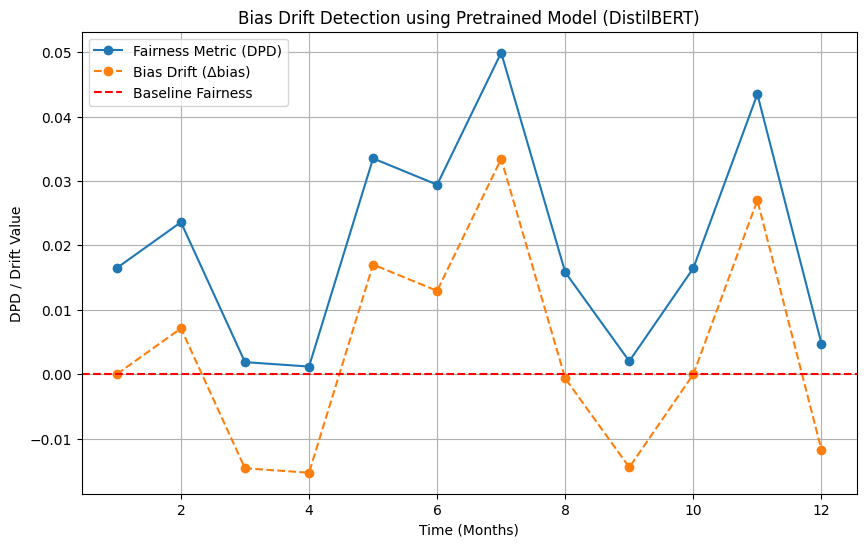

In [6]:
import matplotlib.pyplot as plt

baseline = bias_values[0]
bias_drift = [v - baseline for v in bias_values]

plt.figure(figsize=(10,6))
plt.plot(range(1,13), bias_values, label="Fairness Metric (DPD)", marker='o')
plt.plot(range(1,13), bias_drift, label="Bias Drift (Δbias)", marker='o', linestyle='--')
plt.axhline(0, color='red', linestyle='--', label='Baseline Fairness')
plt.title("Bias Drift Detection using Pretrained Model (DistilBERT)")
plt.xlabel("Time (Months)")
plt.ylabel("DPD / Drift Value")
plt.legend()
plt.grid(True)
plt.show()


In [7]:
latest_drift = abs(bias_drift[-1])
if latest_drift > 0.05:
    print(f"Significant Bias Drift Detected! | Δbias = {latest_drift:.3f}")
else:
    print(f"Model Fairness Stable | Δbias = {latest_drift:.3f}")


Model Fairness Stable | Δbias = 0.012
